<a href="https://colab.research.google.com/github/artificpiyush/Quantum_comp_mini_project/blob/main/quantum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Traveling Salesman Problem (TSP) with QAOA

The Traveling Salesman Problem (TSP) is a classic optimization problem where a salesman must visit a list of cities, each exactly once, and return to the starting city. The objective is to minimize the total travel distance. This problem is NP-hard, making it computationally challenging for classical computers as the number of cities increases.(For simplicity , I am taking the number of cities to be 4)

In this notebook, we will solve the TSP using Quantum Approximate Optimization Algorithm (QAOA) with Qiskit. However, it gives differet output, I have tried to use QUBO and interpret the result.

 ### Step 0 :Installing the Required libraries

In [63]:
!pip install qiskit-algorithms
!pip install qiskit-optimization
!pip install qiskit-aer
!pip install qiskit.utils

### Step 1 : Importing Qiskit and checkng out the version

In [64]:
import qiskit
print(qiskit.__version__)

1.2.1


In [65]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_algorithms import QAOA
from qiskit.primitives import Sampler
from qiskit_algorithms.optimizers import COBYLA
from qiskit_optimization.converters import QuadraticProgramToQubo
from qiskit_optimization.applications import Tsp
from qiskit_algorithms.utils import algorithm_globals

In [66]:
# Setting the seed so that output can be reproducible

algorithm_globals.random_seed = 123

In [67]:
from qiskit_aer import AerSimulator
from qiskit_aer import Aer
from qiskit import transpile

## Step 2: Defining the Distance Matrix

The distance matrix represents the distances between each pair of cities. We will assume 4 cities for simplicity, and the distances are represented as a 4x4 matrix( let us suppose).

The matrix is visualized to give a clear understanding of the distances between cities.

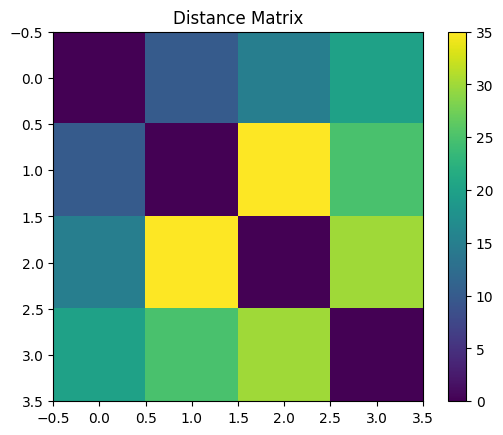

In [68]:
# Defining the distances between cities
num_cities = 4   # (let us suppose)

distances = np.array([[0, 10, 15, 20],
                      [10, 0, 35, 25],
                      [15, 35, 0, 30],
                      [20, 25, 30, 0]])

# Visualisation of the distance matrix
plt.imshow(distances, cmap='viridis')
plt.colorbar()
plt.title("Distance Matrix")
plt.show()

## Step 3: Converting TSP to a Quadratic Program

Using Qiskit's Quadratic Program, we map the TSP to a quantum optimization problem. The Quadratic Unconstrained Binary Optimization (QUBO) formulation is used to represent the problem in a way suitable for quantum algorithms.

In [69]:
# Creating a TSP instance
tsp = Tsp(distances)
quadratic_program = tsp.to_quadratic_program()

# Converting the TSP quadratic problem to a QUBO problem
qubo = QuadraticProgramToQubo().convert(quadratic_program)

## Step 4: Solving the Problem with QAOA


Now, we employ QAOA to solve the QUBO representation of the TSP. QAOA alternates between problem-specific and mixing operators to find the optimal solution for the given problem.

We also use the COBYLA optimizer to fine-tune the parameters of the quantum circuit.

In [70]:
# Setting up the simulator backend
backend = Aer.get_backend('qasm_simulator')

# Creating a sampler using the backend
# sampler = Sampler()

# Using QAOA to solve the QUBO problem
qaoa = QAOA(
    sampler=Sampler(),
    optimizer=COBYLA(),
    reps=3,
)

qaoa_solver = MinimumEigenOptimizer(qaoa)
result = qaoa_solver.solve(qubo)

# Checking out the results
print(f"Optimal value: {result.fval}")
print(f"Optimal solution: {result.x}")

<ipython-input-70-a4bbb81698be>:9: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler=Sampler(),


Optimal value: 80.0
Optimal solution: [0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0.]


## Step 5: Visualizing the Optimal Path


To make the solution more intuitive, we plot the optimal path using NetworkX. The cities are represented as nodes, and the paths between them are shown as directed edges, with the corresponding distances labeled on the edges.

This graph visually demonstrates the optimal route calculated by the quantum algorithm for solving the TSP.

In [73]:
# Extract the optimal path and the corresponding distances
path = []
edge_labels = {}
for i in range(num_cities):
    for j in range(num_cities):
        if solution[i][j] == 1:
            path.append((i, j))
            edge_labels[(i, j)] = distances[i][j]  # Add distance as the label

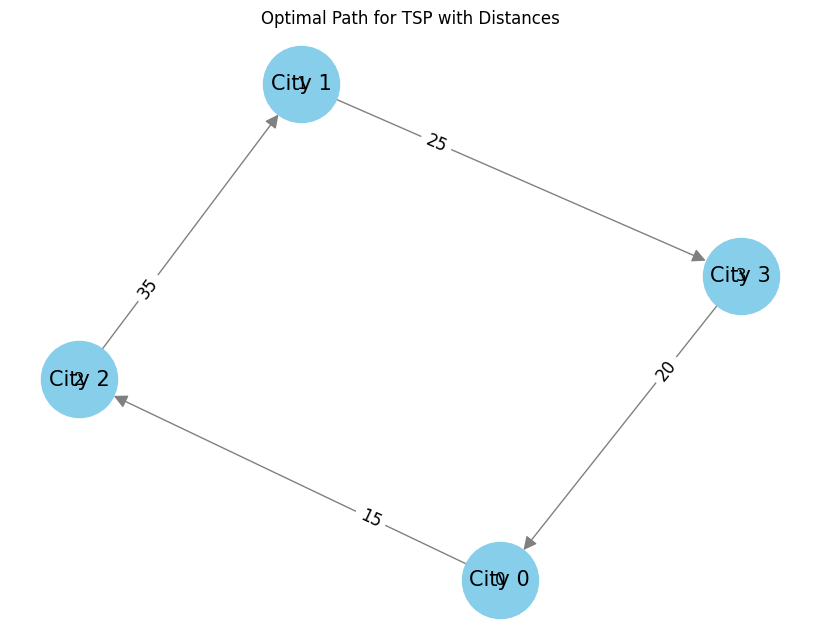

In [74]:
# Create the directed graph
G = nx.DiGraph()
G.add_edges_from(path)

# Position the nodes in a circular layout for clarity
pos = nx.spring_layout(G)  # Using spring layout for better node spacing

# Labels for the cities (nodes)
labels = {i: f"City {i}" for i in range(num_cities)}

# Plot the graph
plt.figure(figsize=(8, 6))

# Draw the graph with nodes and edges
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=3000, edge_color='gray', arrowsize=20)

# Draw labels for the cities
nx.draw_networkx_labels(G, pos, labels, font_size=15)

# Add distance labels on the edges
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12, label_pos=0.3)

plt.title("Optimal Path for TSP with Distances")
plt.show()